In [1]:
import shutil
import os
import business_logic
from data_access import RoomDataAccess

source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.
os.environ["DB_FILE"] = db_file

In [3]:
hm = business_logic.HotelManager()

In [9]:
hotels = hm.read_hotels_by_city("Bern")
for hotel in hotels:
    print(hotel.name)

hotel = hotels[0] # TODO: Lass benutzer mit input wählen
all_room_types = hm.all_room_types(hotel)
for room_type in all_room_types:
    print(room_type.description)

NameError: name 'hm' is not defined

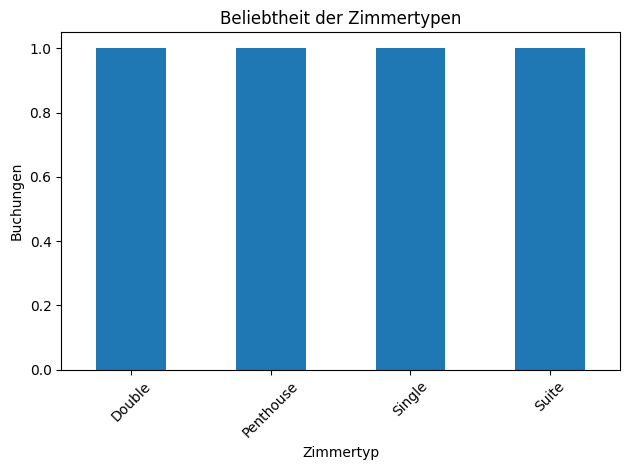

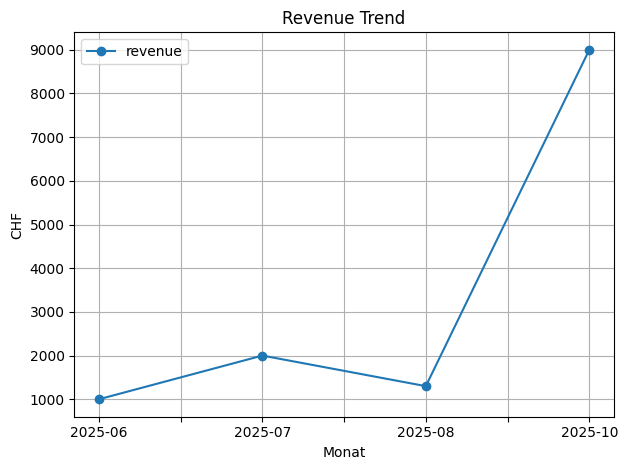

DatabaseError: Execution failed on sql '
    SELECT AVG(age) AS avg_age FROM Guest
    ': no such column: age

In [57]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

with sqlite3.connect(db_file) as conn:
    query = """
    SELECT rt.description AS room_type, COUNT(*) AS total_bookings
    FROM Booking b
    JOIN Room r ON b.room_id = r.room_id
    JOIN Room_Type rt ON r.type_id = rt.type_id
    WHERE b.is_cancelled = 0
    GROUP BY rt.description
    """

    df = pd.read_sql_query(query, conn)

# Visualisierung
df.plot(kind="bar", x="room_type", y="total_bookings", legend=False, title="Beliebtheit der Zimmertypen")
plt.ylabel("Buchungen")
plt.xlabel("Zimmertyp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


with sqlite3.connect(db_file) as conn:
    query = """
    SELECT strftime('%Y-%m', check_in_date) AS month, SUM(total_amount) AS revenue
    FROM Booking
    WHERE is_cancelled = 0
    GROUP BY month
    ORDER BY month
    """
    df = pd.read_sql_query(query, conn)


df.plot(kind="line", x="month", y="revenue", marker='o', title="Revenue Trend")
plt.ylabel("CHF")
plt.xlabel("Monat")
plt.grid(True)
plt.tight_layout()
plt.show()

with sqlite3.connect(db_file) as conn:
    query = """
    SELECT AVG(age) AS avg_age FROM Guest
    """
    df = pd.read_sql_query(query, conn)
    conn.close()

    print("Durchschnittsalter der Gäste:", round(df['avg_age'][0], 1))


In [54]:
def test(s: str):
    print(s)

test(1)

1


 Als Gast möchte ich die verfügbaren Hotels durchsuchen, damit
ich dasjenige auswählen kann, welches meinen Wünschen
entspricht. Wünsche sind:
1.1. Ich möchte alle Hotels in einer Stadt durchsuchen,
damit ich das Hotel nach meinem bevorzugten Standort
(Stadt) auswählen kann.

In [3]:
from data_access.hotel_data_access import HotelDataAccess
from utils.Inputs import validate_search_inputs_1_1

import shutil
source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.


hotel_da = HotelDataAccess(db_file)

try:
    city_input = input("Stadt eingeben: ")

    validate_search_inputs_1_1(city_input)

    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.search_hotels_by_city(city_input)
    for h in hotels:
        print(f"Hotel Name : {h.name} in der Stadt {city_input}")

except ValueError as e:
    print("Fehler:", e)


##Read available Rooms by hotel (Room Manager) -> gebe Hotelobjekt als Parameter von UI. MEthode in Room Acces get Rooms by Hotel ID (available and booked) -> braucht check in / out datum


Hotel Name : Bellevue Palace in der Stadt Bern


In [34]:
import shutil
import os
import pandas as pd

print(hotel)



Hotel(id=3, name='Grand Hotel National')


1.2. Ich möchte alle Hotels in einer Stadt nach der
Anzahl der Sterne (z.B. mindestens 4 Sterne) durchsuchen.

In [5]:


from data_access.hotel_data_access import HotelDataAccess
from utils.Inputs import validate_search_inputs_1_2

import shutil

source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file)

hotel_da = HotelDataAccess(db_file)

try:
    city_input = input("Stadt eingeben: ")
    stars_input = int(input("Sterne eingeben: "))

    validate_search_inputs_1_2(city_input, stars_input)

    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.search_hotels_by_city_and_stars(city_input, stars_input)
    for h in hotels:
        print(f"Hotel Name: {h.name} in der Stadt {city_input},\nAnzahl Sterne: {h.stars}")

except ValueError as e:
    print("Fehler:", e)


Hotel Name: Bellevue Palace in der Stadt Bern,
Anzahl Sterne: 5


1.3. Ich möchte alle Hotels in einer Stadt durchsuchen,
die Zimmer haben, die meiner Gästezahl entsprechen (nur 1
Zimmer pro Buchung)

In [8]:

from data_access.hotel_data_access import HotelDataAccess
from business_logic import hotel_manager
from utils.Inputs import validate_search_inputs_1_3

import shutil

source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file)


hotel_da = HotelDataAccess(db_file)


try:
    city_input = input("Stadt eingeben: ")
    stars_input = int(input("Sterne eingeben: "))
    guests_input = int(input("Anzahl Gäste eingeben: "))

    validate_search_inputs_1_3(city_input, stars_input, guests_input)

    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.search_hotels_for_guests(city_input, stars_input, guests_input)
    for h in hotels:
        print(f"Hotel Name: {h.name} in der Stadt {city_input},\nAnzahl Sterne: {h.stars}\nAnzahl Gäste: {h.room_type.max_guests}\n")

except ValueError as e:
    print("Fehler:", e)

Fehler: Maximal 5 Personen pro Buchung erlaubt.


1.4. Ich möchte alle Hotels in einer Stadt durchsuchen,
die während meines Aufenthaltes ("von" (check_in_date)
und "bis" (check_out_date)) Zimmer zur Verfügung haben,
damit ich nur relevante Ergebnisse sehe.

In [2]:
from data_access.hotel_data_access import HotelDataAccess
from utils.Inputs import validate_search_inputs_1_1
from datetime import datetime


import shutil
source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.


hotel_da = HotelDataAccess(db_file)

try:
    city_input = input("Stadt eingeben: ")
    check_in = input("Check-in Datum eingeben (YYYY-MM-DD): ")
    check_out = input("Check-out Datum eingeben (YYYY-MM-DD): ")


    check_in_date = datetime.strptime(check_in, "%Y-%m-%d")
    check_out_date = datetime.strptime(check_out, "%Y-%m-%d")
    nights = (check_out_date - check_in_date).days


    if nights <= 0:
        raise ValueError("Nights must be positive")

    validate_search_inputs_1_1(city_input)

    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.search_hotel_Aufenthalt(city_input, check_in_date, check_out_date)

    if not hotels:
        print("Keine verfügbaren Hotels für den angegebenen Zeitraum.")
    for h in hotels:
        for room in h.rooms:
            total_price = room.price_per_night * nights
            print(f"Hotel Name: {h.name} in der Stadt {h.address.city}")
            print(f"  Beschreibung des Zimmers: {room.room_type.description}")
            print(f"  Maximale Anzahl Gäste: {room.room_type.max_guests}")
            print(f"  Preis pro Nacht: {room.price_per_night:.2f} CHF")
            print(f"  Gesamtpreis für {nights} Nächte: {total_price:.2f} CHF\n")

except ValueError as e:
    print("Fehler:", e)

Hotel Name: Bellevue Palace in der Stadt Bern
  Beschreibung des Zimmers: Penthouse
  Maximale Anzahl Gäste: 6
  Preis pro Nacht: 1500.00 CHF
  Gesamtpreis für 4 Nächte: 6000.00 CHF



1.5. Ich möchte Wünsche kombinieren können, z.B. die
verfügbaren Zimmer zusammen mit meiner Gästezahl und der
mindest Anzahl Sterne.

In [7]:
from data_access.hotel_data_access import HotelDataAccess
from utils.Inputs import validate_search_inputs_1_1
from datetime import datetime
import traceback


import shutil
source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.

hotel_da = HotelDataAccess(db_file)

try:

    city_input = input("Stadt eingeben: ")
    check_in = input("Check-in Datum eingeben (YYYY-MM-DD): ")
    check_out = input("Check-out Datum eingeben (YYYY-MM-DD): ")
    min_stars = int(input("Minimale Anzahl Sterne: "))
    guest_count = int(input("Maximale Anzahl Gäste: "))

    # Umwandlung der Datumsstrings in datetime-Objekte
    check_in_date = datetime.strptime(check_in, "%Y-%m-%d")
    check_out_date = datetime.strptime(check_out, "%Y-%m-%d")
    nights = (check_out_date - check_in_date).days

    if nights <= 0:
        raise ValueError("Check-out Datum muss nach dem Check-in liegen.")

    validate_search_inputs_1_1(city_input)

    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.search_hotel_combinated(
        city=city_input,
        check_in_date=check_in,
        check_out_date=check_out,
        min_stars=min_stars,
        max_guests=guest_count
    )

    for h in hotels:
        for room in h.rooms:
            total_price = room.price_per_night * nights
            print(f"Hotel: {h.name} ({h.stars}) in {h.address.city}")
            print(f"  Zimmer: {room.room_type.description} ({room.room_type.max_guests} Gäste)")
            print(f"  Preis pro Nacht: {room.price_per_night:.2f} CHF")
            print(f"  Gesamtpreis für {nights} Nächte: {total_price:.2f} CHF")
            print()

except ValueError as e:
    print("Fehler:", e)




Hotel: Bellevue Palace (5★) in Bern
  Zimmer: Penthouse (6 Gäste)
  Preis pro Nacht: 1500.00 CHF
  Gesamtpreis für 4 Nächte: 6000.00 CHF



1.6. Ich möchte die folgenden Informationen pro Hotel
sehen: Name, Adresse, Anzahl der Sterne.

In [3]:

from data_access.hotel_data_access import HotelDataAccess
from utils.Inputs import validate_search_inputs_1_2
import traceback
import pandas as pd
import shutil

source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file)

hotel_da = HotelDataAccess(db_file)

try:

    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.zeige_Information_pro_Hotel()

    data = []
    for hotel in hotels:
        data.append({
            "Hotel-ID": hotel.hotel_id,
            "Name": hotel.name,
            "Sterne": hotel.stars,
            "Straße": hotel.address.street,
            "Stadt": hotel.address.city,
            "PLZ": hotel.address.zip_code
        })

    df = pd.DataFrame(data)
    print(df)

except ValueError as e:
    print("Fehler:", e)
except Exception as ex:
    print("Unerwarteter Fehler:", ex)


   Hotel-ID                            Name  Sterne             Straße  \
0         1               Hotel Baur au Lac       5   Bahnhofstrasse 1   
1         2  Four Seasons Hôtel des Bergues       5    Rue du Rhône 42   
2         3            Grand Hotel National       5  Pilatusstrasse 15   
3         4                 Bellevue Palace       5      Marktgasse 59   
4         5                  Les Trois Rois       5    Freiestrasse 10   

    Stadt   PLZ  
0  Zürich  8001  
1  Genève  1204  
2  Luzern  6003  
3    Bern  3011  
4   Basel  4051  


Als Gast möchte ich Details zu verschiedenen Zimmertypen
(Single, Double, Suite usw.), die in einem Hotel verfügbar
sind, sehen, einschliesslich der maximalen Anzahl von Gästen
für dieses Zimmer, Beschreibung, Preis und Ausstattung, um eine
fundierte Entscheidung zu treffen.




In [7]:
from data_access.hotel_data_access import HotelDataAccess
from model.room_type import RoomType
from model.room import Room
from datetime import datetime

from utils.Inputs import validate_search_inputs_1_1
import traceback
import shutil
source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.


hotel_da = HotelDataAccess(db_file)



try:
    city_input = input("Stadt eingeben: ")
    check_in = input("Check-in Datum eingeben (YYYY-MM-DD): ")
    check_out = input("Check-out Datum eingeben (YYYY-MM-DD): ")


    check_in_date = datetime.strptime(check_in, "%Y-%m-%d")
    check_out_date = datetime.strptime(check_out, "%Y-%m-%d")
    nights = (check_out_date - check_in_date).days




    if nights <= 0:
        raise ValueError("Nights must be positive")


    validate_search_inputs_1_1(city_input)


    hotel_da = HotelDataAccess(db_file)
    hotels = hotel_da.search_hotel_print_rooms(city_input)
    for h in hotels:
        for room in h.rooms:
            total_price = room.price_per_night * nights
            print(f"Hotel Name: {h.name} in der Stadt {h.address.city}")
            print(f"  Beschreibung des Zimmers: {room.room_type.description}")
            print(f"  Maximale Anzahl Gäste: {room.room_type.max_guests}")
            print(f"  Preis pro Nacht: {room.price_per_night:.2f} CHF")
            print(f"  Gesamtpreis für {nights} Nächte: {total_price:.2f} CHF")
            print()

except ValueError as e:
    print("Fehler:", e)


Hotel Name: Hotel Baur au Lac in der Stadt Zürich
  Beschreibung des Zimmers: Single
  Maximale Anzahl Gäste: 1
  Preis pro Nacht: 250.00 CHF
  Gesamtpreis für 2 Nächte: 500.00 CHF

Hotel Name: Hotel Baur au Lac in der Stadt Zürich
  Beschreibung des Zimmers: Double
  Maximale Anzahl Gäste: 2
  Preis pro Nacht: 400.00 CHF
  Gesamtpreis für 2 Nächte: 800.00 CHF



2.1. Ich möchte die folgenden Informationen pro Zimmer
sehen: Zimmertyp, max. Anzahl der Gäste, Beschreibung,
Ausstattung, Preis pro Nacht und Gesamtpreis.

In [2]:
from data_access.hotel_data_access import HotelDataAccess
from model.room_type import RoomType
from model.room import Room
from datetime import datetime
import pandas as pd
import shutil

from utils.Inputs import validate_search_inputs_1_1
import traceback

source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.


hotel_da = HotelDataAccess(db_file)

try:

    nights_input = int(input("Bitte Anzahl Nächte eingeben: "))


    nights = (nights_input)
    if nights <= 0:
        raise ValueError("Anzahl Nächte muss größer als 0 sein.")


    zimmer_liste = hotel_da.show_Information_per_room(nights=nights)

    df = pd.DataFrame(zimmer_liste)
    print(df)

except ValueError as e:
    print("Fehler:", e)
except Exception as ex:
    print("Unerwarteter Fehler:", ex)

   Zimmer-ID    Zimmertyp  Max. Gäste       Ausstattung  \
0          1       Single           1          WiFi, TV   
1          2       Double           2              WiFi   
2          3        Suite           4  Air Conditioning   
3          4  Family Room           5          Mini Bar   
4          5    Penthouse           6             Keine   

   Preis pro Nacht (CHF)  Gesamtpreis für 3 Nächte (CHF)  
0                  250.0                           750.0  
1                  400.0                          1200.0  
2                  650.0                          1950.0  
3                  900.0                          2700.0  
4                 1500.0                          4500.0  


2.2. Ich möchte nur die verfügbaren Zimmer sehen, sofern
ich meinen Aufenthalt (von – bis) spezifiziert habe.

In [4]:
from data_access.hotel_data_access import HotelDataAccess
from model.room_type import RoomType
from model.room import Room
from datetime import datetime

from utils.Inputs import validate_search_inputs_1_1
import traceback
import shutil
source = "database/hotel_reservation_sample.db"
db_file = "database/working_db.db"
shutil.copyfile(source, db_file) #Copy original DB first to always start fresh.


hotel_da = HotelDataAccess(db_file)

try:

    city_input = input("Stadt eingeben: ").strip()
    check_in = input("Check-in Datum eingeben (YYYY-MM-DD): ").strip()
    check_out = input("Check-out Datum eingeben (YYYY-MM-DD): ").strip()
    nights = (datetime.strptime(check_out, "%Y-%m-%d") - datetime.strptime(check_in, "%Y-%m-%d")).days

    if nights <= 0:
        raise ValueError("Check-out-Datum muss nach dem Check-in-Datum liegen.")

    # DB-Zugriff vorbereiten
    hotel_da = HotelDataAccess(db_file)

    # Suche Hotels mit verfügbaren Zimmern in der gewünschten Stadt
    hotels = hotel_da.search_hotel_print_rooms(city_input, check_in, check_out)

    if not hotels:
        print("Keine verfügbaren Zimmer in dieser Stadt im angegebenen Zeitraum gefunden.")
    else:
        for h in hotels:
            print(f"Hotel: {h.name} ({h.address.city})")
            for room in h.rooms:
                total_price = room.price_per_night * nights
                print(f"  → Zimmertyp: {room.room_type.description}")
                print(f"     Max. Gäste: {room.room_type.max_guests}")
                print(f"     Preis pro Nacht: {room.price_per_night:.2f} CHF")
                print(f"     Gesamtpreis ({nights} Nächte): {total_price:.2f} CHF\n")

except ValueError as e:
    print("Fehler:", e)
except Exception as e:
    print("Unerwarteter Fehler:", e)



Hotel: Hotel Baur au Lac (Zürich)
  → Zimmertyp: Single
     Max. Gäste: 1
     Preis pro Nacht: 250.00 CHF
     Gesamtpreis (4 Nächte): 1000.00 CHF

Hotel: Hotel Baur au Lac (Zürich)
  → Zimmertyp: Double
     Max. Gäste: 2
     Preis pro Nacht: 400.00 CHF
     Gesamtpreis (4 Nächte): 1600.00 CHF

